In [16]:
import random
import numpy as np
from math import exp,log
from matplotlib import pyplot as plt
import time
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn   
import torch.optim as optim
import pandas as pd
import tensorflow as tf 

from __future__ import print_function
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [17]:
batch_size = 10000

train_data = datasets.MNIST('datasets/', train=True, download = True, transform=transforms.ToTensor())
test_data = datasets.MNIST('datasets/', train=False, download = True, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

In [18]:
train_data  

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [19]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.in_dim = 28*28
        self.out_dim = 10
        
        self.fc1 = nn.Linear(self.in_dim,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,64)
        self.fc5 = nn.Linear(64, self.out_dim)
        
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()
        
    def forward(self,x):
        
        z1 = self.fc1(x.view(-1,self.in_dim))
        a1 = self.relu(self.fc1(x.view(-1,self.in_dim)))
        #print("a1",a1)
        z2 = self.fc2(a1)
        a2 = self.relu(self.fc2(a1))
        #print("a2",a2)
        a3 = self.relu(self.fc3(a2))
        #print("a3",a3)
        a4 = self.relu(self.fc4(a3))
        #print("a4",a4)
        logit = self.fc5(a4)
        return logit, z1, a1, z2, a2, a3, a4

In [20]:
model= MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [21]:
for epoch in range(1):
    running_loss=0.0
    for i, data in enumerate(train_loader,0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs, z1, a1, z2, a2, a3, a4 = model(inputs)
        
        if(epoch == 0 and i == 0):
            print(epoch, i)
            z11 = z1
            z22 = z2
            a11 = a1
            a22 = a2
            label = labels
            
            a11 = a11.detach().numpy()
            a22 = a22.detach().numpy()
            z11 = z11.detach().numpy()
            z22 = z22.detach().numpy()
            label = label.detach().numpy()
            print(epoch, i)
        else:
          if(i % 1000 == 0) : 
            print(i)
          a1 = a1.detach().numpy()
          a2 = a2.detach().numpy()
          z1 = z1.detach().numpy()
          z2 = z2.detach().numpy()
          label2 = labels.detach().numpy()
        
          z11 = tf.concat([z11,z1],0)
          z22 = tf.concat([z22,z2],0)
          a11 = tf.concat([a11,a1],0)
          a22 = tf.concat([a22,a2],0)
          label = tf.concat([label,label2],0)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        
        running_loss += loss.item()
        if (i+1) % 100 ==0:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i+1, running_loss/2000))
            running_loss = 0.0
            
print("Finished Training")

0 0
0 0
Finished Training


In [22]:
label = label.numpy()
label

array([7, 7, 2, ..., 4, 4, 5], dtype=int64)

In [23]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

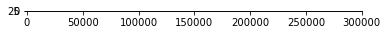

GroundTruth
    7   2   1   0   4   1   4   9   5   9   0   6   9   0   1   5   9   7   3   4   9   6   6   5   4   0   7   4   0   1   3   1   3   4   7   2   7   1   2   1   1   7   4   2   3   5   1   2   4   4   6   3   5   5   6   0   4   1   9   5   7   8   9   3   7   4   6   4   3   0   7   0   2   9   1   7   3   2   9   7   7   6   2   7   8   4   7   3   6   1   3   6   9   3   1   4   1   7   6   9   6   0   5   4   9   9   2   1   9   4   8   7   3   9   7   4   4   4   9   2   5   4   7   6   7   9   0   5   8   5   6   6   5   7   8   1   0   1   6   4   6   7   3   1   7   1   8   2   0   2   9   9   5   5   1   5   6   0   3   4   4   6   5   4   6   5   4   5   1   4   4   7   2   3   2   7   1   8   1   8   1   8   5   0   8   9   2   5   0   1   1   1   0   9   0   3   1   6   4   2   3   6   1   1   1   3   9   5   2   9   4   5   9   3   9   0   3   6   5   5   7   2   2   7   1   2   8   4   1   7   3   3   8   8   7   9   2   2   4   1   5   9   8   7   2   3   

Prediction
    4   4   2   4   4   4   4   4   4   4   2   2   4   4   2   2   4   4   2   4   4   4   4   2   4   4   4   4   2   2   2   4   2   4   4   4   4   2   4   2   2   4   4   4   2   2   4   4   4   2   2   4   2   4   4   2   4   2   4   4   4   4   4   4   4   4   4   4   2   4   4   7   2   2   2   4   2   4   2   4   4   4   2   4   4   4   4   2   4   2   2   4   2   4   2   4   4   4   4   4   4   4   4   4   4   4   2   2   4   4   2   4   2   4   4   4   4   4   4   4   2   2   4   4   4   4   4   4   4   4   4   2   4   4   4   2   4   2   4   4   2   2   4   2   4   4   4   4   4   4   4   2   4   2   2   4   4   4   4   4   4   4   4   2   4   4   4   2   2   4   4   2   2   2   4   2   2   2   2   4   2   2   4   2   2   4   4   2   4   2   2   4   4   4   4   2   2   2   4   2   7   4   4   2   2   2   4   2   2   4   4   4   4   4   4   4   2   4   2   2   4   4   4   4   2   2   4   4   2   4   2   4   4   4   4   4   4   4   4   2   2   2   2   4   2   4   2

In [24]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images,nrow=batch_size))
print('GroundTruth')
print("  "+' '.join('%3s' % label.item() for label in labels))

outputs, z1, a1, z2, a2, a3, a4 = model(images)
print(outputs)
_, predicted = torch.max(outputs, 1)
print('Prediction')
print("  "+' '.join('%3s' % label.item() for label in predicted))

In [25]:
n_predict = 0
n_correct = 0

for data in test_loader:
    inputs, labels = data
    outputs, z1, a1, z2, a2, a3, a4 = model(inputs)
    _, predicted = torch.max(outputs, 1)
    
    n_predict += len(predicted)
    n_correct += (labels == predicted).sum()
    
print(f"{n_correct}/{n_predict}")
print(f"Accuracy: {n_correct/n_predict:.3f}")

1112/10000
Accuracy: 0.111


In [26]:
print(a11.shape)
print(a22.shape)
print(z11.shape)
print(z22.shape)

(60000, 512)
(60000, 256)
(60000, 512)
(60000, 256)


In [27]:
a11 = a11.numpy()
a22 = a22.numpy()
z11 = z11.numpy()
z22 = z22.numpy()

### **여기부터 plot 그리는 부분!!**

In [28]:
X = a11[540000:600000]
y = label[540000:600000]

print(f'X.shape : {X.shape}')
print(f'y.shape : {y.shape}')


X.shape : (0, 512)
y.shape : (0,)


In [29]:
feat_cols = [f'pixel{i}' for  i in range(X.shape[1])]


In [30]:
df = pd.DataFrame(X, columns=feat_cols)


In [31]:
df['y'] = y
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel503,pixel504,pixel505,pixel506,pixel507,pixel508,pixel509,pixel510,pixel511,y


In [32]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
print(df.shape[0])

0


In [33]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
print(pca_result.shape)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


ValueError: Found array with 0 sample(s) (shape=(0, 512)) while a minimum of 1 is required.

In [ ]:
plt.figure(figsize=(13,9))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
plt.show()

In [ ]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} secpmds'.format(time.time()-time_start))

In [ ]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)